# NOME Dataset


BREVE DESCRICAO DO PROBLEMA

# Importando as bibliotecas

In [1]:
# data analysis
import numpy as np
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import matplotlib.colors
from matplotlib import rcParams
labelsize = 14
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
import seaborn as sns
sns.set_style('white')

# machine learning...
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import recall_score, roc_auc_score, roc_curve

# Funções
Vamos criar algumas funções que irão otimizar nosso trabalho

## Avaliação dos modelos


In [2]:
def eval_models(X, y, model, metric='accuracy'):
    """
    Função para avaliar os modelos
    --------------------------------------------------------------
    Parametros:
    X = valores de entrada (input values)
    y = variável alvo (target value)
    model = modelo que sera avaliado
    metric = metrica de desempenho. Por padrão "accuracy". Obs: para classes desbalanceadas não é melhor metrica de avaliação.
    consultar link para ver outras opções : https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    --------------------------------------------------------------
    Retorna:
    Pontuação (score) do modelo avaliado
    
    """
    # definindo nosso KFold Cross-Validation.
    kf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # avaliando com cross_val_score
    scores = cross_val_score(model, X, y, scoring=metric, cv=kf, n_jobs=-1)
    # retornando pontuação
    return scores

## Definição dos modelos

In [3]:
def get_models(models=dict()):
    """
    Retorna um dicionário de nomes de modelos mapeados para o objeto de modelo scikit-learn
    """
    # MODELOS LINEARES
    models['log'] = LogisticRegression()
    alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for a in alphas:
        models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
    models['pac'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
    models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
    models['lda'] = LinearDiscriminantAnalysis()
    
    # MODELOS NAO LINEARES
    for k in range(1, 21):
        models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
    models['cart'] = DecisionTreeClassifier()
    models['extra'] = ExtraTreeClassifier()
    models['svml'] = SVC(kernel='linear')
    models['svmp'] = SVC(kernel='poly')
    c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for c in c_values:
        models['svmr-'+str(c)] = SVC(C=c)
    models['nb'] = GaussianNB()
    
    # MODELOS ENSEMBLE
    models['ada'] = AdaBoostClassifier(n_estimators=100)
    models['rf'] = RandomForestClassifier(n_estimators=100)
    models['gb'] = GradientBoostingClassifier(n_estimators=100)
    models['xgb'] = XGBClassifier()
    models['lgb'] = LGBMClassifier(n_estimators=100)
    
    print(f"Foram definidos {len(models)} modelos:")
    return models

## Apresentação dos resultados

In [4]:
def show_results(resultados, maximize=True, top_n=10):
    """
     Seleciona os melhores modelos e os apresenta em forma de ranking do melhor para o pior.
    resultados = dict contendo nome do modelo atrelado ao seu score
    maximize = por padrao True.
    top_n = Indica quantos modelo apresentar. Por padrão 10
    """
    meanScores = [(k, v.mean()) for k, v in resultados.items()] # gerando a tupla com (nome, media(pontuação))
    meanScores = sorted(meanScores, key=lambda x: x[1]) # ordenando do menor para o maior
    if maximize:
        meanScores = list(reversed(meanScores)) # faz a reversão do resultado (maior pra menor)
    nomes = [x[0] for x in meanScores[:top_n]] # pegando os nomes dos melhores resultados
    scores = [resultados[x[0]] for x in meanScores[:top_n]] # armazenando as pontuaçães
    # criando o loop para apresentar os resultados
    for i in range(top_n):
        nome = nomes[i]
        meanScore, stdScore = resultados[nome].mean(), resultados[nome].std()
        print(f"Pos:{i+1}, Model:{nome}, Score:{round(meanScore, 4)} ({round(stdScore, 4)})")
        
    # plotar o resultados
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.boxplot(scores, showmeans=True)
    ax.set_title("Melhores Resultados", fontsize=17)
    ax.set_xticklabels(labels=nomes, rotation=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    

# Importando dados

In [1]:
# IMPORTANDO OS DADOS

DESCRICAO DE ONDE OS DADOS VIERAM


In [2]:
# verificando as primeiras entradas


Os nomes das nossas features são os seguintes:



# EDA


## Começando pelo Básico

### Qual o tamanho do conjunto de dados?
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso conjunto de dados é composto por 1372 observações(entradas) sendo 4 variáveis de entrada e 1 variável de saída (variável alvo).

In [3]:
# size of dataset


---

### Quais são os tipos de dados das minhas features?
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas. 

In [4]:
# types of my features


---

###  Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um conjunto de dados está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises 

In [5]:
# Null Values


---

### Resumo estatístico
O método `pd.describe()` nos ajuda a visualizar as propriedades estatísticas de variáveis numéricas. Exclui variáveis de caracteres.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - (Q1) primeiro quartil 25
* **50%** - mediana
* **75%** - (Q3) terceiro quartil 75
* **max** - maior valor da coluna

Com método `pd.describe()` é possível identificar colunas com possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [7]:
# describe data


Conclusões:



---

### Histograma
Uma maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Os histogramas agrupam dados em posições e fornecem uma contagem do número de observações em cada posição. A partir da forma das caixas você pode ter uma ideia rápida de se um atributo é gaussiano, inclinado ou mesmo se tem uma distribuição exponencial. Isso é importante porque muitos algoritmos de aprendizagem de máquinas têm melhor desempenho quando a distribuição das variáveis é gaussiana. Portanto, saber de antemão como está nossa distribuição vai nos ajudar a escolher técnicas de escalonamento mais apropriada para nosso conjunto de dados.

In [8]:
# hist


conclusao


---

### Box plot  
Um gráfico de caixa é um método para representar graficamente grupos de dados numéricos através de seus quartis. A caixa se estende dos valores do quartil Q1 a Q3 dos dados, com uma linha na mediana (Q2). Os bigodes se estendem desde as bordas da caixa para mostrar o intervalo dos dados. A posição dos bigodes é definido por padrão como `[1.5 * IQR (IQR = Q3 – Q1)]` nas bordas da caixa. Pontos extremos (*outliers*) são aqueles que passaram do fim dos bigodes e identificá-los é importante porque eles podem distorcer uma distribuição de probabilidade e dificultar o dimensionamento de dados usando a padronização (ex. *StandartScaler()*, *MinMaxScaler()*), pois a média e o desvio padrão calculados serão distorcidos pela presença dos mesmos.


<p align="center">
  <img width=700 src="https://miro.medium.com/max/1218/1*r41SQj0LbdCV6rWoIos6mA.png">
</p>   

Vamos à visualização:

In [10]:
# boxplot

Conclusões:



---

### Gráfico de dispersão

Gráfico de dispersão mostra o relacionamento entre duas variáveis como pontos em duas dimensões, um eixo para cada atributo. São úteis para identificar relacionamentos estruturados entre variáveis. O *sns.pairplot()* que usaremos para gerar nosso gráfico de dispersão ainda permite passar o parâmetro *hue=* que adiciona uma terceira dimensão onde podemos definir como sendo nossa classe e assim conseguimos ver como está sua distribuição de forma colorida.

---

## Análise da variálvel alvo
Nosso objetivo é verificar como está o balanceamento da nossa variável alvo no conjunto de dados. Isso porque dados desequilibrados é algo comum e a maioria dos conjuntos de dados de classificação não possui um número exatamente igual de instâncias em cada classe, mas uma pequena diferença geralmente não importa. Já em problemas onde temos classes altamente desequilibradas algumas estratégias podem ser adotadas, como:
* **Coletar mais dados**(Caso possível): Um conjunto de dados maior pode expor uma perspectiva diferente e talvez mais equilibra sobre as classes
* **Mudar a métrica de avaliação**: Acurácia(*Accuracy*) não é a métrica a ser usada ao trabalhar com um conjunto de dados desequilibrados. Existem métricas que foram projetadas para contar uma história mais verdadeira ao trabalhar com classes desequilibradas:
    
    >* Matriz de Confusão;
    >* Precisão;
    >* Recall;
    >* pontuação f1;
    >* Kappa de cohen;
    >* Curva ROC.    
* **Alterar o conjunto de dados**: Utilizar métodos como *Oversampling* e *Undersampling*

---

# Dividir os dados Treino/Teste

In [11]:
# train/test split


---

# Modelo de Referência(*Baseline*)
O DummyClassifier nos permite criar um modelo muito simples que podemos usar como referência para comparar com outros modelos


In [17]:
# criar modelo de referencia


---

Nosso modelo de referência atingiu uma acurácia de ~54%. Vamos agora avaliar os modelos definidos e ver se conseguimos resultados melhores.

# Avaliando Modelos

---

# apresentar os resultados


# Transformação dos Dados
Muitos algoritmos de *machine learning* têm um melhor desempenho quando as variáveis numéricas de entrada são escaladas para um intervalo padronizado. Isto inclui algoritmos que utilizam uma soma ponderada, como a regressão linear, e algoritmos que utilizam medidas de distância, como os vizinhos k-nearest. 

Entretanto, é difícil saber se o redimensionamento dos seus dados melhorará o desempenho dos seus algoritmos antes de os aplicar. Muitas vezes pode, mas nem sempre. Uma boa dica é testar vários transformadores e compará-los isto pode rapidamente realçar os benefícios (ou falta deles) de redimensionar os seus dados com determinados modelos, e qual o método de redimensionamento que pode ser digno de mais investigação.

Vamos criar funções onde utilizaremos o pacote `sklearn.prepocessing` que vai conter os transformadores e o pacote `sklearn.pipeline` que vai aplicar os transformadores definidos aos nossos modelos. O objetivo do pipeline é encapsular todo o processo logo, fica muito mais fácil validá-lo de forma correta e confiável evitando possíveis erros e vazamento dos dados.

In [21]:
def pipeNone(model):
    return model

def pipeNorm(model):
    steps = []
    steps.append(('n', MinMaxScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeStd(model):
    steps = []
    steps.append(('s', StandardScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeRobu(model):
    steps = []
    steps.append(('r', RobustScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeQuant(model):
    steps = []
    steps.append(('q', QuantileTransformer()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

pipelines = [pipeNone, pipeNorm, pipeStd, pipeRobu, pipeQuant]

In [22]:
models = get_models()

resultados = dict()

for name, model in models.items():
    for i in range(len(pipelines)):
        scores = eval_models(X_train, y_train, model=pipelines[i](model), metric='recall')
        resultados["["+str(i)+"]"+name] = scores
        print(f"Model:[{i}]{name}, Score:{round(scores.mean(), 4)} ({round(scores.std(), 4)})")

Foram definidos 54 modelos:
Model:[0]log, Score:0.9952 (0.0096)
Model:[1]log, Score:0.9728 (0.0289)
Model:[2]log, Score:0.9968 (0.0081)
Model:[3]log, Score:1.0 (0.0)
Model:[4]log, Score:0.9952 (0.0096)
Model:[0]ridge-0.1, Score:0.9976 (0.0073)
Model:[1]ridge-0.1, Score:0.9976 (0.0073)
Model:[2]ridge-0.1, Score:0.9976 (0.0073)
Model:[3]ridge-0.1, Score:0.9976 (0.0073)
Model:[4]ridge-0.1, Score:1.0 (0.0)
Model:[0]ridge-0.2, Score:0.9976 (0.0073)
Model:[1]ridge-0.2, Score:0.9976 (0.0073)
Model:[2]ridge-0.2, Score:0.9976 (0.0073)
Model:[3]ridge-0.2, Score:0.9976 (0.0073)
Model:[4]ridge-0.2, Score:1.0 (0.0)
Model:[0]ridge-0.3, Score:0.9976 (0.0073)
Model:[1]ridge-0.3, Score:0.9984 (0.006)
Model:[2]ridge-0.3, Score:0.9976 (0.0073)
Model:[3]ridge-0.3, Score:0.9976 (0.0073)
Model:[4]ridge-0.3, Score:1.0 (0.0)
Model:[0]ridge-0.4, Score:0.9976 (0.0073)
Model:[1]ridge-0.4, Score:0.9984 (0.006)
Model:[2]ridge-0.4, Score:0.9976 (0.0073)
Model:[3]ridge-0.4, Score:0.9976 (0.0073)
Model:[4]ridge-0.4, 

Pos:1, Model:[4]svmr-1.0, Score:1.0 (0.0)
Pos:2, Model:[3]svmr-1.0, Score:1.0 (0.0)
Pos:3, Model:[2]svmr-1.0, Score:1.0 (0.0)
Pos:4, Model:[1]svmr-1.0, Score:1.0 (0.0)
Pos:5, Model:[0]svmr-1.0, Score:1.0 (0.0)
Pos:6, Model:[4]svmr-0.9, Score:1.0 (0.0)
Pos:7, Model:[3]svmr-0.9, Score:1.0 (0.0)
Pos:8, Model:[2]svmr-0.9, Score:1.0 (0.0)
Pos:9, Model:[1]svmr-0.9, Score:1.0 (0.0)
Pos:10, Model:[0]svmr-0.9, Score:1.0 (0.0)


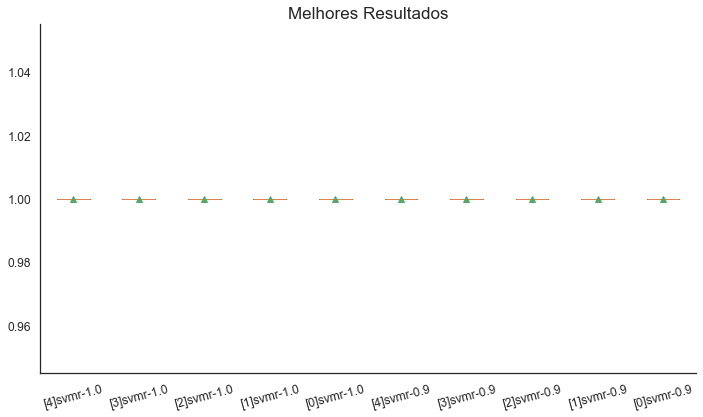

In [23]:
show_results(resultados)

# Modelo Final
Como praticamente todos nossos modelos tiverem um bom desempenho vou utilizar o algoritmo de **regressão logística** para ser nosso modelo final. Isso porque diferente dos outros algoritmos que definimos a regressão logística não possui realmente nenhum parâmetro crítico para ajustar. E como nosso conjunto de dados apresentou *outliers* vamos utilizar como padronizador o *RobustScaler()* que apresentou uma boa performance com o algoritmo de regressão logística nos testes realizados. 

In [24]:
# modelos mais simples Regressão Logística
model = LogisticRegression()
transformer = RobustScaler()

# criando pipeline
finalModel = Pipeline(steps=[('t', transformer), ('m', model)])

In [25]:
scores = eval_models(X_train, y_train, model=finalModel, metric='f1')

In [26]:
scores

array([0.96470588, 1.        , 0.97619048, 0.98823529, 0.98823529,
       0.97674419, 0.97674419, 0.97674419, 0.97674419, 0.98795181,
       0.96470588, 0.98795181, 0.97619048, 0.97674419, 0.97674419,
       0.98823529, 0.96551724, 0.97674419, 1.        , 1.        ,
       0.95348837, 1.        , 1.        , 0.96551724, 0.98823529,
       0.96551724, 0.96551724, 1.        , 1.        , 0.97619048])

In [27]:
scores.mean()

0.9813198208047192

In [28]:
# treinando modelo final
finalModel.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('t',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('m',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [29]:
# realizando as previsões
p = finalModel.predict(X_valid)

## Avaliando modelo final
Para avaliar nosso modelo vamos utilizar as seguintes métricas:
* **Relatório de Classificação (Classification Report)** - Exibe a precisão (*precision*), recuperação (*recall*), pontuação F1 (*f1 score*) e suporte (*support*)
    * Precisão : É a capacidade do classificador não rotular uma observação negativa verdadeira como positiva. Mede a **exatidão** dos classificadores
    * Recuperação: É a capacidade do classificador de encontrar exemplos positivos. Se quiséssemos ter certeza de encontrar todos os exemplos positivos poderíamos maximizar o recall. Mede a **integridade** dos classificadores
    * Pontuação f1: É a média harmônica de precisão e recall. Os valores variam de **0(ruim)** a **1(bom)**
    
    * Suporte: É o numero de ocorrências de cada classe.
* **Cohen Kappa**: precisão da classificação normalizada pelo desequilíbrio das classes nos dados
* **ROC AUC Score**: Capacidade de um modelo de discriminar entre classes positivas e negativas. Uma área de 1 representa um modelo que fez todas as previsões perfeitamente. Uma área de 0.5 representa um modelo tão bom quanto aleatório


### Resultados

In [30]:
# metricas
# classification report
print(f"Relatório de Classificação:\n\n{classification_report(y_valid,p)}")
print("-"*60)
print(f"Cohen Kappa Score: {round(cohen_kappa_score(y_valid, p), 4)}")
print("-"*60)
print(f"ROC AUC Score: {round(roc_auc_score(y_valid, p), 4)}")

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       259
           1       0.96      0.99      0.98       194

    accuracy                           0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453

------------------------------------------------------------
Cohen Kappa Score: 0.9596
------------------------------------------------------------
ROC AUC Score: 0.9813


Podemos ver que nosso modelo teve otimos resultado. Generalizou bem o que indica que o mesmo irá se sair bem com novos dados. Vamos agora ver esse resultado de forma gráfica apresentando a matrix de confusão e a curva roc.

#### Matriz de confusão
É uma apresentação útil da precisão de um modelo com duas ou mais classes. A tabela apresenta previsões no eixo x e os resultados de precisão no eixo y. Valores corretos que queremos que nosso modelo acerte estão na diagonal (esquerda para direita)

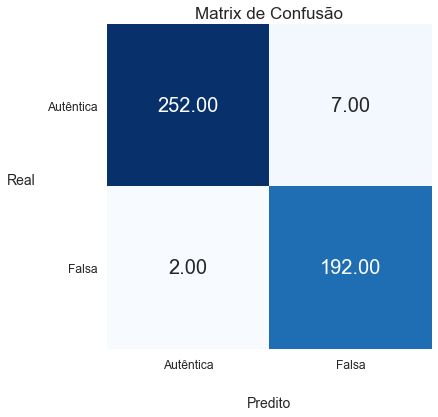

In [31]:
matrix = confusion_matrix(y_valid, p) # criando matrix de confusão
confusionDf = pd.DataFrame(matrix, index=[0, 1], columns=['Autêntica','Falsa'])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusionDf, cmap='Blues', cbar=None, square=True, annot=True, fmt='.2f', linecolor='white', annot_kws={"size": 20}, ax=ax)
ax.set_title("Matrix de Confusão", fontsize=17)
ax.set_ylabel("Real", fontsize=14, rotation=0, labelpad=25)
ax.set_yticklabels(labels=['Autêntica','Falsa'], rotation=0)
ax.set_xlabel("Predito", fontsize=14, rotation=0, labelpad=25)

plt.tight_layout()

O que a matriz de confusão nos mostrou:
* Em um total de 259 entradas que eram verdadeiras, ou seja, representavam nossa `class = 0` nosso modelo acertou 252 e errou 7
* Em um total de 194 entradas que eram falsas, ou seja, representavam nossa `class = 1` nosso modelo acertou 192 e errou 2

#### Curva ROC
É um gráfico da taxa positiva verdadeira e da taxa positiva falsa para um determina conjunto de previsões de probabilidades em diferentes limites usados para mapear as probabilidades para os rótulos das classes. A área sob a curva é então a integral aproximada sob a curva ROC. É a representação gráfica do resultado apresentado anteriormente (ROC AUC Score: 0.9813)

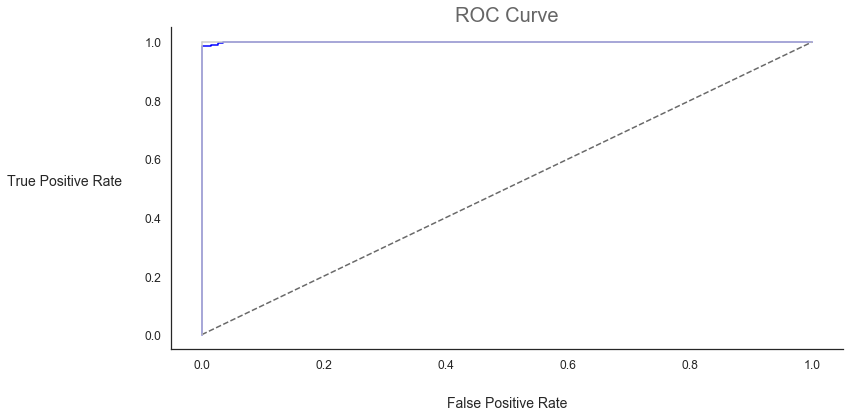

In [32]:
target_prob = finalModel.predict_proba(X_valid)[:,1] # instanciando as probalidades 
fpr, tpr, threshold = roc_curve(y_valid, target_prob) # instanciando as taxas de falso e verdadeiras

# Plotando Curva ROC
fig , ax = plt.subplots(figsize=(12, 6))
ax.plot(fpr, tpr, color='blue')
ax.plot([0, 1], ls='--', color='dimgrey'), ax.plot([0, 0], [1, 0], c=".8")
ax.plot([1, 1], c='.8')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("ROC Curve", fontsize=20, c=".4")
ax.set_xlabel("False Positive Rate", fontsize=14, labelpad=25)
ax.set_ylabel("True Positive Rate", fontsize=14, rotation=0, labelpad=80)

plt.tight_layout()

# Conclusões
A autenticação das notas de banco é uma tarefa importante. Não é fácil fazer essa detecção de forma manual. A utilização de algoritmos de *machine learning* podem auxiliar estes processos. Neste artigo, mostramos o fluxo de trabalho para um projeto de  *machine learning* que envolve primeiramente entender nosso conjunto de dados, através da análise exploratória dos dados, visualização gráfica a fim de definirmos as melhores abordagens a serem aplicas na construção do modelo final. Para esse projeto em específico nosso modelo de regressão logística teve uma precisão de 98%.
